基于Sesame，获取所有NGC天体的位置

In [37]:
from pyongc import ongc
from astropy.coordinates import SkyCoord
from astropy import units as u
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed
import time

ngc_name = ["NGC" + str(i) for i in range(1, 7841)]
results = {}
failed_ngc = set(ngc_name)
max_retries = 10  # 最大重试次数
retry_count = 0

def get_skycoord(ngc_n):
    try:
        return SkyCoord.from_name(ngc_n)
    except Exception as e:
        print(f"获取 {ngc_n} 时出错: {e}")
        return None

num_threads = 128

while failed_ngc and retry_count < max_retries:
    temp_failed_ngc = set()
    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        futures = {executor.submit(get_skycoord, ngc_n): ngc_n for ngc_n in failed_ngc}
        for future in tqdm(as_completed(futures), total=len(futures)):
            ngc_n = futures[future]
            result = future.result()
            if result:
                results[ngc_n] = result
            else:
                temp_failed_ngc.add(ngc_n)
    if temp_failed_ngc == failed_ngc:
        print("本次迭代没有取得进展，停止重试。")
        break
    failed_ngc = temp_failed_ngc
    retry_count += 1
    if failed_ngc:
        print(f"重试获取 {len(failed_ngc)} 个失败的 NGC 目标，第 {retry_count} 次重试。")
        time.sleep(1)  # 等待一段时间再重试

# 将结果保存到文件
with open('coordinates.txt', 'w') as f:
    for ngc_n, coord in results.items():
        f.write(f"{ngc_n} {coord.to_string('hmsdms')}\n")

  1%|▏         | 107/7840 [00:16<04:58, 25.93it/s] 

获取 NGC5877 时出错: Unable to find coordinates for name 'NGC5877' using http://vizier.cfa.harvard.edu/viz-bin/nph-sesame/A?NGC5877


 11%|█         | 861/7840 [01:25<12:25,  9.36it/s]  

获取 NGC6498 时出错: Unable to find coordinates for name 'NGC6498' using http://vizier.cfa.harvard.edu/viz-bin/nph-sesame/A?NGC6498


 54%|█████▍    | 4240/7840 [06:16<03:09, 18.99it/s]

获取 NGC6344 时出错: Unable to find coordinates for name 'NGC6344' using http://vizier.cfa.harvard.edu/viz-bin/nph-sesame/A?NGC6344


 55%|█████▌    | 4346/7840 [06:25<01:50, 31.59it/s]

获取 NGC5901 时出错: Unable to find coordinates for name 'NGC5901' using http://vizier.cfa.harvard.edu/viz-bin/nph-sesame/A?NGC5901


 84%|████████▍ | 6612/7840 [09:58<01:26, 14.13it/s]

获取 NGC6298 时出错: Unable to find coordinates for name 'NGC6298' using http://vizier.cfa.harvard.edu/viz-bin/nph-sesame/A?NGC6298


 88%|████████▊ | 6903/7840 [10:28<00:52, 17.91it/s]

获取 NGC1525 时出错: Unable to find coordinates for name 'NGC1525' using https://cds.unistra.fr/cgi-bin/nph-sesame/A?NGC1525


 88%|████████▊ | 6906/7840 [10:28<00:57, 16.31it/s]

获取 NGC7575 时出错: Unable to find coordinates for name 'NGC7575' using https://cds.unistra.fr/cgi-bin/nph-sesame/A?NGC7575


 90%|█████████ | 7072/7840 [10:50<01:11, 10.72it/s]

获取 NGC6353 时出错: Unable to find coordinates for name 'NGC6353' using http://vizier.cfa.harvard.edu/viz-bin/nph-sesame/A?NGC6353


 91%|█████████ | 7123/7840 [10:52<00:25, 27.80it/s]

获取 NGC6506 时出错: Unable to find coordinates for name 'NGC6506' using https://cds.unistra.fr/cgi-bin/nph-sesame/A?NGC6506


 92%|█████████▏| 7205/7840 [11:02<00:18, 33.55it/s]

获取 NGC5884 时出错: Unable to find coordinates for name 'NGC5884' using http://vizier.cfa.harvard.edu/viz-bin/nph-sesame/A?NGC5884


 92%|█████████▏| 7243/7840 [11:06<01:57,  5.09it/s]

获取 NGC607 时出错: Unable to find coordinates for name 'NGC607' using https://cds.unistra.fr/cgi-bin/nph-sesame/A?NGC607


 94%|█████████▍| 7366/7840 [11:20<00:40, 11.72it/s]

获取 NGC3548 时出错: Unable to find coordinates for name 'NGC3548' using https://cds.unistra.fr/cgi-bin/nph-sesame/A?NGC3548


 94%|█████████▍| 7395/7840 [11:24<00:51,  8.71it/s]

获取 NGC2999 时出错: Unable to find coordinates for name 'NGC2999' using https://cds.unistra.fr/cgi-bin/nph-sesame/A?NGC2999


 95%|█████████▌| 7458/7840 [11:27<00:14, 26.05it/s]

获取 NGC5578 时出错: Unable to find coordinates for name 'NGC5578' using https://cds.unistra.fr/cgi-bin/nph-sesame/A?NGC5578


 97%|█████████▋| 7641/7840 [11:46<00:41,  4.80it/s]

获取 NGC7627 时出错: Unable to find coordinates for name 'NGC7627' using https://cds.unistra.fr/cgi-bin/nph-sesame/A?NGC7627


100%|██████████| 7840/7840 [12:12<00:00, 10.70it/s]


重试获取 15 个失败的 NGC 目标，第 1 次重试。
获取 NGC3548 时出错: Unable to find coordinates for name 'NGC3548' using https://cds.unistra.fr/cgi-bin/nph-sesame/A?NGC3548
获取 NGC6506 时出错: Unable to find coordinates for name 'NGC6506' using https://cds.unistra.fr/cgi-bin/nph-sesame/A?NGC6506
获取 NGC7575 时出错: Unable to find coordinates for name 'NGC7575' using https://cds.unistra.fr/cgi-bin/nph-sesame/A?NGC7575
获取 NGC2999 时出错: Unable to find coordinates for name 'NGC2999' using https://cds.unistra.fr/cgi-bin/nph-sesame/A?NGC2999
获取 NGC5578 时出错: Unable to find coordinates for name 'NGC5578' using https://cds.unistra.fr/cgi-bin/nph-sesame/A?NGC5578
获取 NGC607 时出错: Unable to find coordinates for name 'NGC607' using https://cds.unistra.fr/cgi-bin/nph-sesame/A?NGC607
获取 NGC1525 时出错: Unable to find coordinates for name 'NGC1525' using https://cds.unistra.fr/cgi-bin/nph-sesame/A?NGC1525
获取 NGC7627 时出错: Unable to find coordinates for name 'NGC7627' using https://cds.unistra.fr/cgi-bin/nph-sesame/A?NGC7627


 73%|███████▎  | 11/15 [00:10<00:03,  1.08it/s]

获取 NGC6353 时出错: Unable to find coordinates for name 'NGC6353' using http://vizier.cfa.harvard.edu/viz-bin/nph-sesame/A?NGC6353
获取 NGC5901 时出错: Unable to find coordinates for name 'NGC5901' using http://vizier.cfa.harvard.edu/viz-bin/nph-sesame/A?NGC5901
获取 NGC6498 时出错: Unable to find coordinates for name 'NGC6498' using http://vizier.cfa.harvard.edu/viz-bin/nph-sesame/A?NGC6498
获取 NGC6344 时出错: Unable to find coordinates for name 'NGC6344' using http://vizier.cfa.harvard.edu/viz-bin/nph-sesame/A?NGC6344
获取 NGC5884 时出错: Unable to find coordinates for name 'NGC5884' using http://vizier.cfa.harvard.edu/viz-bin/nph-sesame/A?NGC5884


100%|██████████| 15/15 [00:11<00:00,  1.30it/s]

获取 NGC6298 时出错: Unable to find coordinates for name 'NGC6298' using http://vizier.cfa.harvard.edu/viz-bin/nph-sesame/A?NGC6298
获取 NGC5877 时出错: Unable to find coordinates for name 'NGC5877' using http://vizier.cfa.harvard.edu/viz-bin/nph-sesame/A?NGC5877
本次迭代没有取得进展，停止重试。


In [51]:
results.get("NGC60")

<SkyCoord (ICRS): (ra, dec) in deg
    (3.99268787, -0.30352478)>

In [62]:
real_ra, real_dec, real_name, ngc_pos = [], [], [], []
temp = []
for i in tqdm(range(1, 7841)):
    try:
        coord = results.get("NGC" + str(i))
        if coord not in temp:
            real_ra.append(coord.ra.deg)
            real_dec.append(coord.dec.deg)
            real_name.append("NGC" + str(i))
            ngc_pos.append(coord)
            temp.append([coord])
    except:
        continue

100%|██████████| 7840/7840 [00:10<00:00, 763.66it/s] 


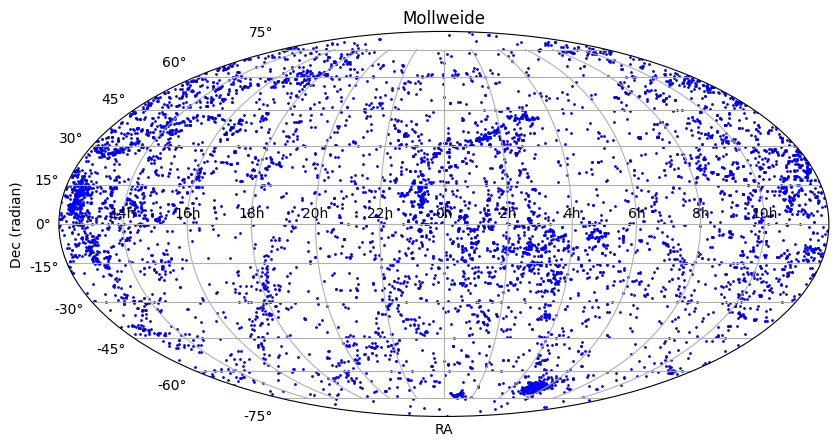

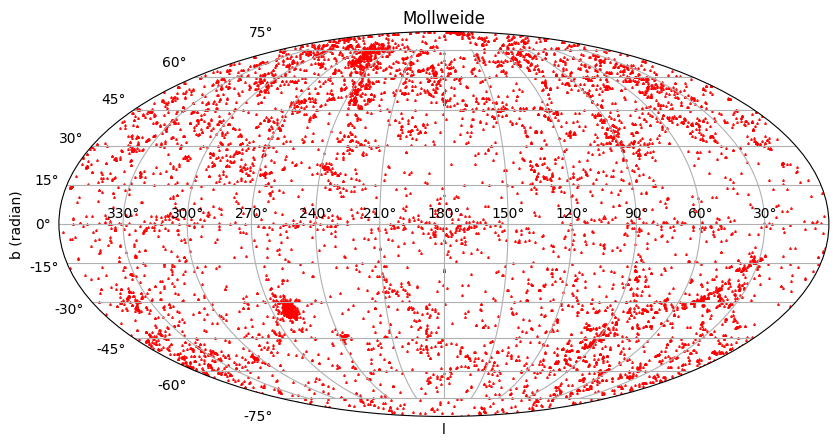

In [63]:
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np

ra_rad = np.array([coord.ra.wrap_at(180*u.deg).radian for coord in ngc_pos])
dec_rad = np.array([coord.dec.radian for coord in ngc_pos])

galactic_coords = [coord.galactic for coord in ngc_pos]
l_rad = np.array([coord.l.wrap_at(180*u.deg).radian for coord in galactic_coords])
b_rad = np.array([coord.b.radian for coord in galactic_coords])

plt.figure(figsize=(10, 5))
ax = plt.subplot(111, projection='mollweide')
ax.scatter(ra_rad, dec_rad, c='blue', marker='o', s=1)
ax.set_xticklabels(['14h', '16h', '18h', '20h', '22h', '0h', '2h', '4h', '6h', '8h', '10h'])
ax.set_xlabel('RA')
ax.set_ylabel('Dec (radian)')
ax.set_title('Mollweide')
ax.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
ax = plt.subplot(111, projection='mollweide')
ax.scatter(l_rad, b_rad, c='red', marker='^', s=1)
ax.set_xticklabels(['330°', '300°', '270°', '240°', '210°', '180°', '150°', '120°', '90°', '60°', '30°'])
ax.set_xlabel('l')
ax.set_ylabel('b (radian)')
ax.set_title('Mollweide')
ax.grid(True)
plt.show()
plt.show()

In [69]:
import numpy as np

def find_duplicate_indices(ra_list, dec_list):
    coords = np.vstack((ra_list, dec_list)).T
    
    # 使用视图将坐标对转换为可哈希的类型
    dtype = np.dtype((np.void, coords.dtype.itemsize * coords.shape[1]))
    coords_view = np.ascontiguousarray(coords).view(dtype)
    
    # 找到唯一的坐标和它们的首次出现索引
    _, idx_first, counts = np.unique(coords_view, return_index=True, return_counts=True)
    
    # 找到重复的坐标
    duplicate_indices = np.where(counts > 1)[0]
    
    duplicates = {}
    for dup_idx in duplicate_indices:
        coord = coords[idx_first[dup_idx]]
        ra_dup, dec_dup = coord
        
        # 找到所有匹配该坐标的索引
        matching_indices = np.where((ra_list == ra_dup) & (dec_list == dec_dup))[0]
        
        # 如果匹配的索引多于一个，说明有重复
        if len(matching_indices) > 1:
            duplicates[(ra_dup, dec_dup)] = matching_indices.tolist()
    
    return duplicates

ra = np.array([coord.ra.deg for coord in ngc_pos])
dec = np.array([coord.dec.deg for coord in ngc_pos])

duplicates = find_duplicate_indices(ra, dec)
d_idx = []
if duplicates:
    print("发现重复的目标位置及其索引：")
    for coord, indices in duplicates.items():
        d_idx.append(indices[-1])
ngc_pos_clean = [ngc_pos[i] for i in range(len(ngc_pos)) if i not in d_idx]

发现重复的目标位置及其索引：


In [78]:
ra = np.array([coord.ra.deg for coord in ngc_pos_clean])
dec = np.array([coord.dec.deg for coord in ngc_pos_clean])

duplicates = find_duplicate_indices(ra, dec)
d_idx = []
if duplicates:
    print("发现重复的目标位置及其索引：")
    for coord, indices in duplicates.items():
        d_idx.append(indices[-1])
        
ngc_pos_clean2 = [ngc_pos_clean[i] for i in range(len(ngc_pos_clean)) if i not in d_idx]

发现重复的目标位置及其索引：


In [85]:
import healpy as hp
import numpy as np

ra = np.array([coord.ra.deg for coord in ngc_pos_clean2])
dec = np.array([coord.dec.deg for coord in ngc_pos_clean2])

# 将 RA 和 Dec 转换为 θ 和 φ，单位为弧度
theta = np.radians(90.0 - dec)  # θ 是天顶角
phi = np.radians(ra)            # φ 是方位角

nside = 2**17  # 根据需要调整

# 获取每个目标所在的像素编号
pixels = hp.ang2pix(nside, theta, phi, nest=False)  # 如果使用 NEST 方案，设置 nest=True

# 统计每个像素的目标数量
npix = hp.nside2npix(nside)
counts = np.bincount(pixels, minlength=npix)
if np.all(counts <= 1):
    print('All targets are separated.')

有些目标离的太近 去掉重复的还是找不出来最小分离

In [ ]:
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.coordinates import search_around_sky
import numpy as np

def get_min_nside_direct_efficient(ra_list, dec_list):
    # 将 RA 和 Dec 转换为 SkyCoord 对象
    coords = SkyCoord(ra=ra_list*u.degree, dec=dec_list*u.degree)
    
    # 设置一个初始搜索半径，例如 1 度
    max_sep = 1 * u.arcsec  # 根据数据分布调整
    
    # 找到最近的邻居
    idx1, idx2, sep2d, _ = search_around_sky(coords, coords, max_sep)

    non_self = idx1 != idx2
    # 确保有非自身匹配的结果
    if np.any(non_self):
        min_sep = np.min(sep2d[non_self]).rad
    else:
        # 如果没有非自身匹配，设置一个大于零的最小角距离
        min_sep = np.inf
    
    if min_sep == 0 or np.isinf(min_sep):
        print("数据中存在重复的目标位置，无法找到满足条件的 nside。")
        return None
    
    nside_required = int(np.ceil(4 / (np.sqrt(3) * (min_sep))))
    nside = 2 ** int(np.ceil(np.log2(nside_required)))
    
    # nside 的最大值不能超过 HEALPix 的限制（一般为 2^29）
    # nside = min(nside, 2**29)
    
    return nside

# 使用示例
min_nside = get_min_nside_direct_efficient(real_ra, real_dec)
if min_nside is not None:
    print(f"最小的 nside 是 {min_nside}")
else:
    print("无法计算满足条件的 nside。")

LAMOST的视场半径2.5度，某次观测视场中心为（Ra，Dec) =（110，30），请在天球坐标中准确画出LAMOST的视场观测范围。

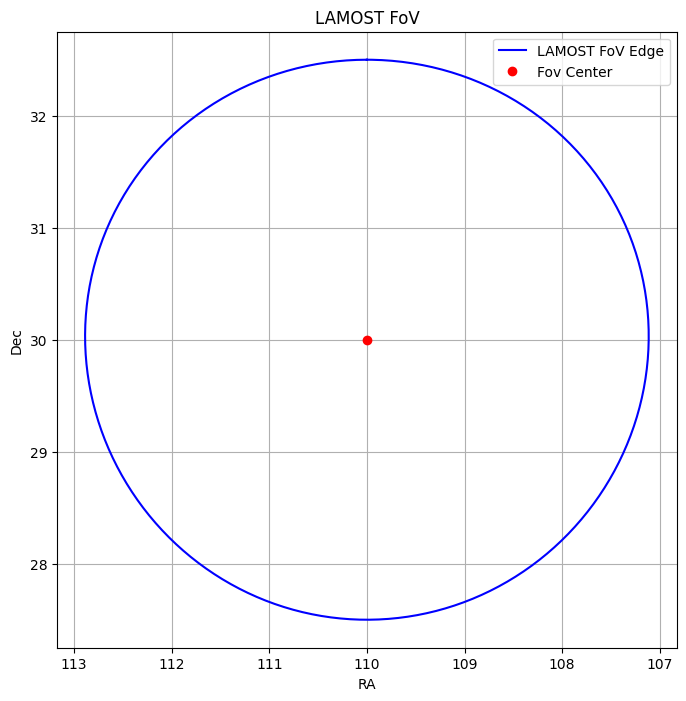

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u

RA0 = 110.0 * u.deg
Dec0 = 30.0 * u.deg
radius = 2.5 * u.deg
pa = np.linspace(0, 360, num=360) * u.deg
center_coord = SkyCoord(ra=RA0, dec=Dec0, frame='icrs')

offset_coords = center_coord.directional_offset_by(pa, radius)

RA_circle = offset_coords.ra.deg
Dec_circle = offset_coords.dec.deg

plt.figure(figsize=(8,8))
plt.plot(RA_circle, Dec_circle, 'b-', label='LAMOST FoV Edge')  # 绘制圆
plt.plot(RA0.value, Dec0.value, 'ro', label='Fov Center')  # 绘制中心点

plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('LAMOST FoV')
plt.legend()
plt.grid(True)
plt.gca().invert_xaxis()  # 反转X轴，使赤经增大向左

plt.show()

### 为什么画出一个正圆？
http://cluster.shao.ac.cn/~shen/Lecture/change_cor.pro


银河系的光度大概是$10^{11}$ 太阳光度，半光度半径Re大约是5Kpc。(太阳的V波段绝对星等是4.8等）。如果银河系距离观测者的距离是100kpc，其视星等和Re的视尺度（apparent size）各是多少？Re内的平均表面亮度是多少？如果距离是1Mpc呢？

In [6]:
import numpy as np
import astropy.units as u
def compute(luminosity, r_eff, dist):
    """
    计算星系在给定 distance 处的视星等和 apparent size
    :param luminosity: 星系的绝对光度（单位为太阳光度）
    :param r_eff: 星系的有效半径（astropy Quantity，单位为长度）
    :param dist: 星系距离（astropy Quantity，单位为长度）
    """
    M_sun = 4.8  # 太阳的绝对星等
    M = M_sun - 2.5 * np.log10(luminosity)  # 绝对星等

    m = M + 5 * np.log10(dist.to(u.pc).value / 10)
    
    # 计算视角尺度（弧秒）
    theta_arcsec = (r_eff.to(u.pc) / dist.to(u.pc)).value * (180 * 3600 / np.pi)
    
    # Re 内的总视星等（考虑到 Re 内的光度为总光度的一半）
    m_Re = m + 2.5 * np.log10(2) # m + \Delta m
    
    # Re 内的面积（平方弧秒）
    A = np.pi * theta_arcsec ** 2
    sb_r_eff = m_Re + 2.5 * np.log10(A)
    return m, theta_arcsec, sb_r_eff
m1, theta1, sb1 = compute(1e11, 5*u.kpc, 100*u.kpc)
print(f"视星等：{m1:.2f}，视直径：{theta1:.2f}角秒，r_eff内的表面亮度：{sb1:.2f}")
m1, theta1, sb1 = compute(1e11, 5*u.kpc, 1*u.Mpc)
print(f"视星等：{m1:.2f}，视直径：{theta1:.2f}角秒，r_eff内的表面亮度：{sb1:.2f}")

视星等：-2.70，视直径：10313.24角秒，r_eff内的表面亮度：19.36
视星等：2.30，视直径：1031.32角秒，r_eff内的表面亮度：19.36
